In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def str2complex(s):
    str = s.replace(" ","").replace("i","j")
    return complex(str)

In [3]:
def PlotFunction(X,Y):
    plt.plot(X,Y)
    plt.ylim((-100, 100))
    plt.show()

In [4]:
filename = './Mode Profile/Mode1_Ey.txt'
Field = np.array([[]])
with open(filename) as f:
    lines = f.readlines()
    Field = np.array([str2complex(s) for s in lines[0].split('\t')])
    for line in lines[1:]:
        line_arr = line.split('\t')
        Field = np.c_[Field,np.array([str2complex(s) for s in line_arr])]

print("# of lines:",len(lines))
print("# of columns:",len(lines[0].split('\t')))
print("shape of Field matrix:",np.shape(Field))

# of lines: 123
# of columns: 123
shape of Field matrix: (123, 123)


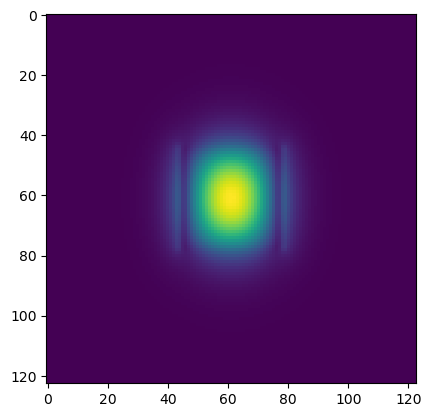

In [5]:
plt.imshow(np.abs(Field))
plt.show()

In [6]:
'''
Known Parameters:
n1      :   refractive index of the waveguide
n0      :   refractive index of the cladding
a       :   width of the waveguide in the r direction
b       :   height of the waveguide in the z direction
lambda0 :   wavelength in vacuum

Unknown Variables:
kx, kr, kz2, kr2

kz^2 + kr^2     = k0^2 * (nz(z)^2+nr(r)^2-n1^2) = k0^2 * n1^2       region  1
kz^2 - kr2^2    = k0^2 * n0^2                                       region  2
-kz2^2 + kr^2   = k0^2 * n0^2                                       region  3
kz2 = kz * tan(kz * b - m * pi / 2)                                 boundary condition
'''
n1      =   1
n0      =   0
b       =   1
lambda0 =   1
#k0      =   2*np.pi/lambda0
k0      =   4

#m = 2*n
def func_0(kz):
    len = np.shape(kz)[0]
    assert n1 > n0
    assert np.all(np.ones(len) * k0**2*(n1**2-n0**2) > kz**2)
    return kz * np.tan(kz * b) - np.sqrt(k0**2*(n1**2-n0**2) - kz**2)

#m = 2*n+1
def func_1(kz):
    len = np.shape(kz)[0]
    assert n1 > n0
    assert np.all(np.ones(len) * k0**2*(n1**2-n0**2) > kz**2)
    return kz * np.tan(kz * b - np.pi/2) - np.sqrt(k0**2*(n1**2-n0**2) - kz**2)

def find_zero(X,func,Threshold = 10):
    Y = func(X)
    res = np.array([])
    found = False
    for i in range(len(Y)-1):
        if found:
            found = False
            continue
        if Y[i] * Y[i+1] <= 0 and Y[i]-Y[i+1] < Threshold:
            found = True
            if Y[i] * Y[i+1] < 0:
                res = np.append(res,(X[i]+X[i+1])/2)
            elif Y[i] == 0:
                res = np.append(res,X[i])
            else:
                res = np.append(res,X[i+1])
    return res


In [8]:
'''
Known Parameters:
n1      :   refractive index of the waveguide
n0      :   refractive index of the cladding
a       :   width of the waveguide in the x direction
b       :   height of the waveguide in the y direction
lambda0 :   wavelength in vacuum

Unknown Variables:
kx, ky, kx2, ky2, beta

kx^2 + ky^2 + beta^2      = k0^2 * (nz(z)^2+nr(r)^2-n1^2) = k0^2 * n1^2       region  1
-kx^2 + ky2^2 + beta^2    = k0^2 * n0^2                                       region  2
kx^2 - ky2^2 + beta^2     = k0^2 * n0^2                                       region  3
kx2 * n1^2 / (kx * n0^2)  = tan(kx * a - m * pi / 2)                boundary condition x
ky2 / ky                  = tan(ky * b - n * pi / 2)                boundary condition y
'''
n1      =   2
n0      =   1
a       =   1
b       =   1
lambda0 =   1
#k0      =   2*np.pi/lambda0
k0      =   2.3

#m = 2*n
def func_kx_0(kx):
    len = np.shape(kx)[0]
    assert n1 > n0
    assert np.all(np.ones(len) * k0**2*(n1**2-n0**2) > kx**2)
    return np.tan(kx * a) - np.sqrt(k0**2*(n1**2-n0**2) - kx**2) / kx * (n1/n0)**2

def func_kx_1(kx):
    len = np.shape(kx)[0]
    assert n1 > n0
    assert np.all(np.ones(len) * k0**2*(n1**2-n0**2) > kx**2)
    return np.tan(kx * a - np.pi*0.5) - np.sqrt(k0**2*(n1**2-n0**2) - kx**2) / kx * (n1/n0)**2

def func_ky_0(ky):
    len = np.shape(ky)[0]
    assert n1 > n0
    assert np.all(np.ones(len) * k0**2*(n1**2-n0**2) > ky**2)
    return np.tan(ky * b) - np.sqrt(k0**2*(n1**2-n0**2) - ky**2) / ky

def func_ky_1(ky):
    len = np.shape(ky)[0]
    assert n1 > n0
    assert np.all(np.ones(len) * k0**2*(n1**2-n0**2) > ky**2)
    return np.tan(ky * b - np.pi*0.5) - np.sqrt(k0**2*(n1**2-n0**2) - ky**2) / ky

def find_zero(X,func,Threshold = 10):
    Y = func(X)
    res = np.array([])
    found = False
    for i in range(len(Y)-1):
        if found:
            found = False
            continue
        if Y[i] * Y[i+1] <= 0 and Y[i]-Y[i+1] < Threshold:
            found = True
            if Y[i] * Y[i+1] < 0:
                res = np.append(res,(X[i]+X[i+1])/2)
            elif Y[i] == 0:
                res = np.append(res,X[i])
            else:
                res = np.append(res,X[i+1])
    return res


In [9]:
k0**2*(n1**2-n0**2)*a**2

15.869999999999997

/var/folders/ch/7r5m10cd1x18pgpw08_ksg300000gn/T/ipykernel_40007/3527670256.py:31: RuntimeWarning: divide by zero encountered in divide
  return np.tan(kx * a) - np.sqrt(k0**2*(n1**2-n0**2) - kx**2) / kx * (n1/n0)**2
/var/folders/ch/7r5m10cd1x18pgpw08_ksg300000gn/T/ipykernel_40007/3527670256.py:37: RuntimeWarning: divide by zero encountered in divide
  return np.tan(kx * a - np.pi*0.5) - np.sqrt(k0**2*(n1**2-n0**2) - kx**2) / kx * (n1/n0)**2


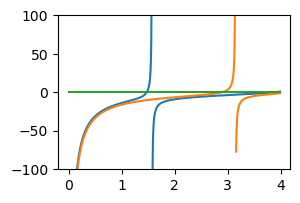

In [10]:
kx_max = np.sqrt(k0**2*(n1**2-n0**2))*0.999
Threshold   =   1e-2

X   = np.linspace(0,kx_max,1000)
Discontinuity_Idx_0 = np.where((X - np.pi*0.5) % np.pi < Threshold)
Y_0 = func_kx_0(X)
Y_0[Discontinuity_Idx_0] = np.nan

Discontinuity_Idx_1 = np.where(X % np.pi < Threshold)
Y_1 = func_kx_1(X)
Y_1[Discontinuity_Idx_1] = np.nan

plt.figure(figsize=(3,2),dpi=100)
plt.plot(X,Y_0)
plt.plot(X,Y_1)
plt.ylim((-100, 100))
plt.plot(X,np.zeros(1000))

In [11]:
X  = np.linspace(0,kx_max,1000)
kx_roots = find_zero(X,func_kx_0)
kx_roots = np.append(kx_roots,find_zero(X,func_kx_1))
kx_roots

/var/folders/ch/7r5m10cd1x18pgpw08_ksg300000gn/T/ipykernel_40007/3527670256.py:31: RuntimeWarning: divide by zero encountered in divide
  return np.tan(kx * a) - np.sqrt(k0**2*(n1**2-n0**2) - kx**2) / kx * (n1/n0)**2
/var/folders/ch/7r5m10cd1x18pgpw08_ksg300000gn/T/ipykernel_40007/3527670256.py:37: RuntimeWarning: divide by zero encountered in divide
  return np.tan(kx * a - np.pi*0.5) - np.sqrt(k0**2*(n1**2-n0**2) - kx**2) / kx * (n1/n0)**2


array([1.47198338, 3.88213208, 2.88620286])

In [19]:
from scipy.special import jv, yv, hankel2

In [36]:
import scipy.integrate as integrate
# Gamma function with complex argument v
def gamma(v):
    vr = np.real(v)
    vi = np.imag(v)

    res_re = integrate.quad(lambda x: np.exp(-x)* x**(vr-1) * np.cos(vi * np.log(x)),
                            0, np.inf)
    res_im = integrate.quad(lambda x: np.exp(-x)* x**(vr-1) * np.sin(vi * np.log(x)),
                            0, np.inf)
    return complex(res_re[0],res_im[0])
gamma(complex(1,0.3))

(0.9182730233911596-0.15084922586068486j)

In [54]:
# Bessel function of the first kind with complex order v
from math import factorial
def BesselJ(v,x,kMax = 100,tol = 1e-3,Force_Expansion = True):
    res = np.zeros(len(x))
    res_last = res
    Rerr = np.zeros(len(x))
    Ierr = np.zeros(len(x))
    if not Force_Expansion:
        if np.isreal(v):
            res = jv(np.real(v), x)
            return res

    for k in range (kMax):
        res_last = res
        res = res + (-0.25 * x * x)**k/(factorial(k) * gamma(v+k+1))

        if not np.any(np.real(res) == 0):
            Rerr = abs((np.real(res) - np.real(res_last))/np.real(res))
        else:
            filter = np.ones(len(res)).astype("bool")
            filter[np.where(np.real(res) == 0)] = False
            Rerr[filter] = abs((np.real(res[filter]) - np.real(res_last[filter]))/np.real(res[filter]))
            Reff[~filter] = abs(np.real(res[~filter]) - np.real(res_last[~filter]))

        if not np.any(np.imag(res) == 0):
            Ierr = abs((np.imag(res) - np.imag(res_last))/np.imag(res))
        else:
            filter = np.ones(len(res)).astype("bool")
            filter[np.where(np.imag(res) == 0)] = False
            Ierr[filter] = abs((np.imag(res[filter]) - np.imag(res_last[filter]))/np.imag(res[filter]))
            Ierr[~filter] = abs(np.imag(res[~filter]) - np.imag(res_last[~filter]))

        if np.max(Rerr) <= tol and np.max(Ierr) <= tol: break

    res = res * (0.5*x) ** v
    return res

# Bessel function of the second kind with complex order v

def BesselY(v,x):
    if np.isreal(v):
        res = bessely(v,x)
    else:
        res = (BesselJ(v,x)*np.cos(v*np.pi)-BesselJ(-v, x))/np.sin(v*np.pi)
    return res

def Hankel_second(v,x):
    return BesselJ(v,x) - complex(0,1)*BesselY(v,x)


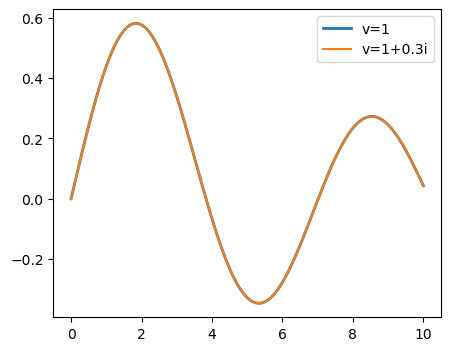

In [66]:
X = np.linspace(0,10,100)
plt.figure(figsize=(5,4))
#plt.plot(X,np.real(BesselJ(1,X)),label = "v=1,Series expansion",lw=4)
plt.plot(X,jv(1, X),label = "v=1",lw=2)
plt.plot(X,np.real(BesselJ(complex(1,1e-8),X)),label = "v=1+0.3i")
plt.legend()


/var/folders/ch/7r5m10cd1x18pgpw08_ksg300000gn/T/ipykernel_99603/3845080076.py:7: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  res_re = integrate.quad(lambda x: np.exp(-x)* x**(vr-1) * np.cos(vi * np.log(x)),
/var/folders/ch/7r5m10cd1x18pgpw08_ksg300000gn/T/ipykernel_99603/3845080076.py:9: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  res_im = integrate.quad(lambda x: np.exp(-x)* x**(vr-1) * np.sin(vi * np.log(x)),
/var/folders/ch/7r5m10cd1x18pgpw08_ksg300000gn/T/ipykernel_99603/1435170928.py:35: RuntimeWarning: invalid value encountered in power
  res = res * (0.5*x) ** v


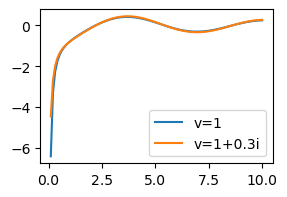

In [53]:
X = np.linspace(0,10,100)
plt.figure(figsize=(3,2))
plt.plot(X,yv(1, X),label = "v=1")
plt.plot(X,np.real(BesselY(complex(1,0.3),X)),label = "v=1+0.3i")
plt.legend()


/Users/harryxwh2003/opt/anaconda3/envs/Standard/lib/python3.13/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/harryxwh2003/opt/anaconda3/envs/Standard/lib/python3.13/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/var/folders/ch/7r5m10cd1x18pgpw08_ksg300000gn/T/ipykernel_99603/3845080076.py:7: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  res_re = integrate.quad(lambda x: np.exp(-x)* x**(vr-1) * np.cos(vi * np.log(x)),
/var/folders/ch/7r5m10cd1x18pgpw08_ksg300000gn/T/ipykernel_99603/3845080076.py:9: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  res_im = integrate.quad(lambda x: np.exp(-x)* x**(vr-1) * np.sin(vi * np.log(x)),
/var/folders/ch/7r5m10cd1x18pgpw08_ksg300000gn/T/ipykernel_99603/3833782160.py:33: RuntimeWarning:

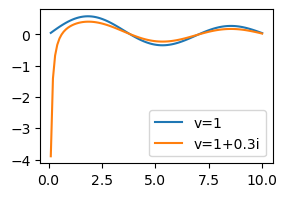

In [49]:
X = np.linspace(0,10,100)
plt.figure(figsize=(3,2))
plt.plot(X,hankel2(1, X),label = "v=1")
plt.plot(X,np.real(Hankel_second(complex(1,0.3),X)),label = "v=1+0.3i")
plt.legend()


In [25]:
X = np.array([0,1,1,complex(0,1)])
filter = np.zeros(10).astype("bool")
filter[np.where(np.real(X) == 0)] = True
filter

array([ True, False, False,  True, False, False, False, False, False,
       False])

In [33]:
X = np.array([0,1,1,complex(1,1)])
X**(complex(1,1))

array([0.        +0.j        , 1.        +0.j        ,
       1.        +0.j        , 0.27395725+0.58370076j])

In [ ]:
X = np.array([2,2,3,-1,-2])
F = np.array([1,1,1,0,0]).astype("bool")
Y = np.ones(5)